Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

Tips for using SVM for image classification

* You should have image data in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D which i'll be showing later on in this notebook).

* SVM algorithm is to be used when their is shortage of data in our dataset .

* If we have good amount of image data so, we look further for CNN model.


**Importing the dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

importing basic Packages..!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

now,we have provided data directory to DATADIR variable and labels of color set to CATEGORIES variable for further use.

In [3]:
DATADIR = '../input/colours_classifier'
CATEGORIES = ['Green','Red','Blue']
IMG_SIZE=100

Ex. of an sample image is shown below


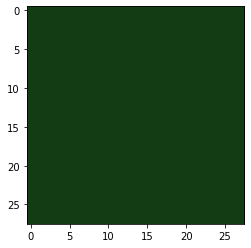

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break


performing preprocessing steps...::


In [5]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [6]:
print(len(training_data))

549


storing trainig length for further use.

In [7]:
lenofimage = len(training_data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [8]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)


In [9]:
X.shape

(549, 30000)

**flattening the array**

In [10]:
X = X/255.0

Ex. of flattened array...

In [11]:
X[1]


array([0.07843137, 0.70588235, 0.23529412, ..., 0.07843137, 0.70588235,
       0.23529412])

note : y should be in array form compulsory.


In [12]:
y=np.array(y)



In [13]:
y.shape

(549,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

**fitting our data in SVM model**

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C = 100)
svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**predicting the X_test**

In [16]:
y2 = svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 1.0


**Ahhyeah....accuracy of 100% which is what we wanted..!!!!**

all the test unseen (X_test) images are classified to their paticular labels

**fromulating the Classification report**

In [18]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        59

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [19]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [20]:
result


,original,predicted
0,2,2
1,2,2
2,0,0
3,2,2
4,0,0
...,...,...
133,0,0
134,0,0
135,2,2
136,2,2


we have moslty classified all the images correctly with their labels .doing classification on limited dataset is always a challenging task....but by SVM we have dealed with it succesfully

now we will classify the iamge singly to their labels

# Color Identification of Unknown image

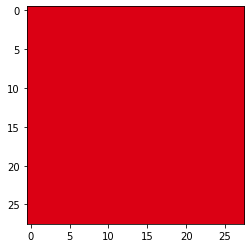

In [21]:
img = cv2.imread('../input/colours_classifier/test/3456.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()



**Performing preprossing steps..!!**

In [22]:
new_array=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

In [23]:
img = np.array(new_array).reshape(1,-1)


In [24]:
img = img/255.0


In [25]:
y3 = svc.predict(img)

({0 : Green , 1 : Red , 2 : Blue})

In [26]:
y3

array([1])

Ahhyeah we have predicted to it specific label i.e Red 

let's try some more images...!!!!!

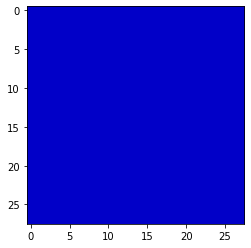

In [27]:
img = cv2.imread('../input/colours_classifier/test/121.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()


In [28]:
new_array=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
img = np.array(new_array).reshape(1,-1)
img = img/255.0
y3 = svc.predict(img)
y3

array([2])

({0 : Green , 1 : Red , 2 : Blue})

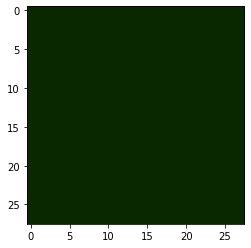

In [29]:
img = cv2.imread('../input/colours_classifier/test/159.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()


In [30]:
new_array=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
img = np.array(new_array).reshape(1,-1)
img = img/255.0
y3 = svc.predict(img)
y3

array([0])

({0 : Green , 1 : Red , 2 : Blue})

Well,we have succesfully tested image to their particular labels

Hence,we have classified image to their particular section...!! *Happy Coding*